In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from theoc.oc import run

# Run an experiment

In [32]:
m = 5
result = run(m=m)

# Visualize the result
## Drive rate

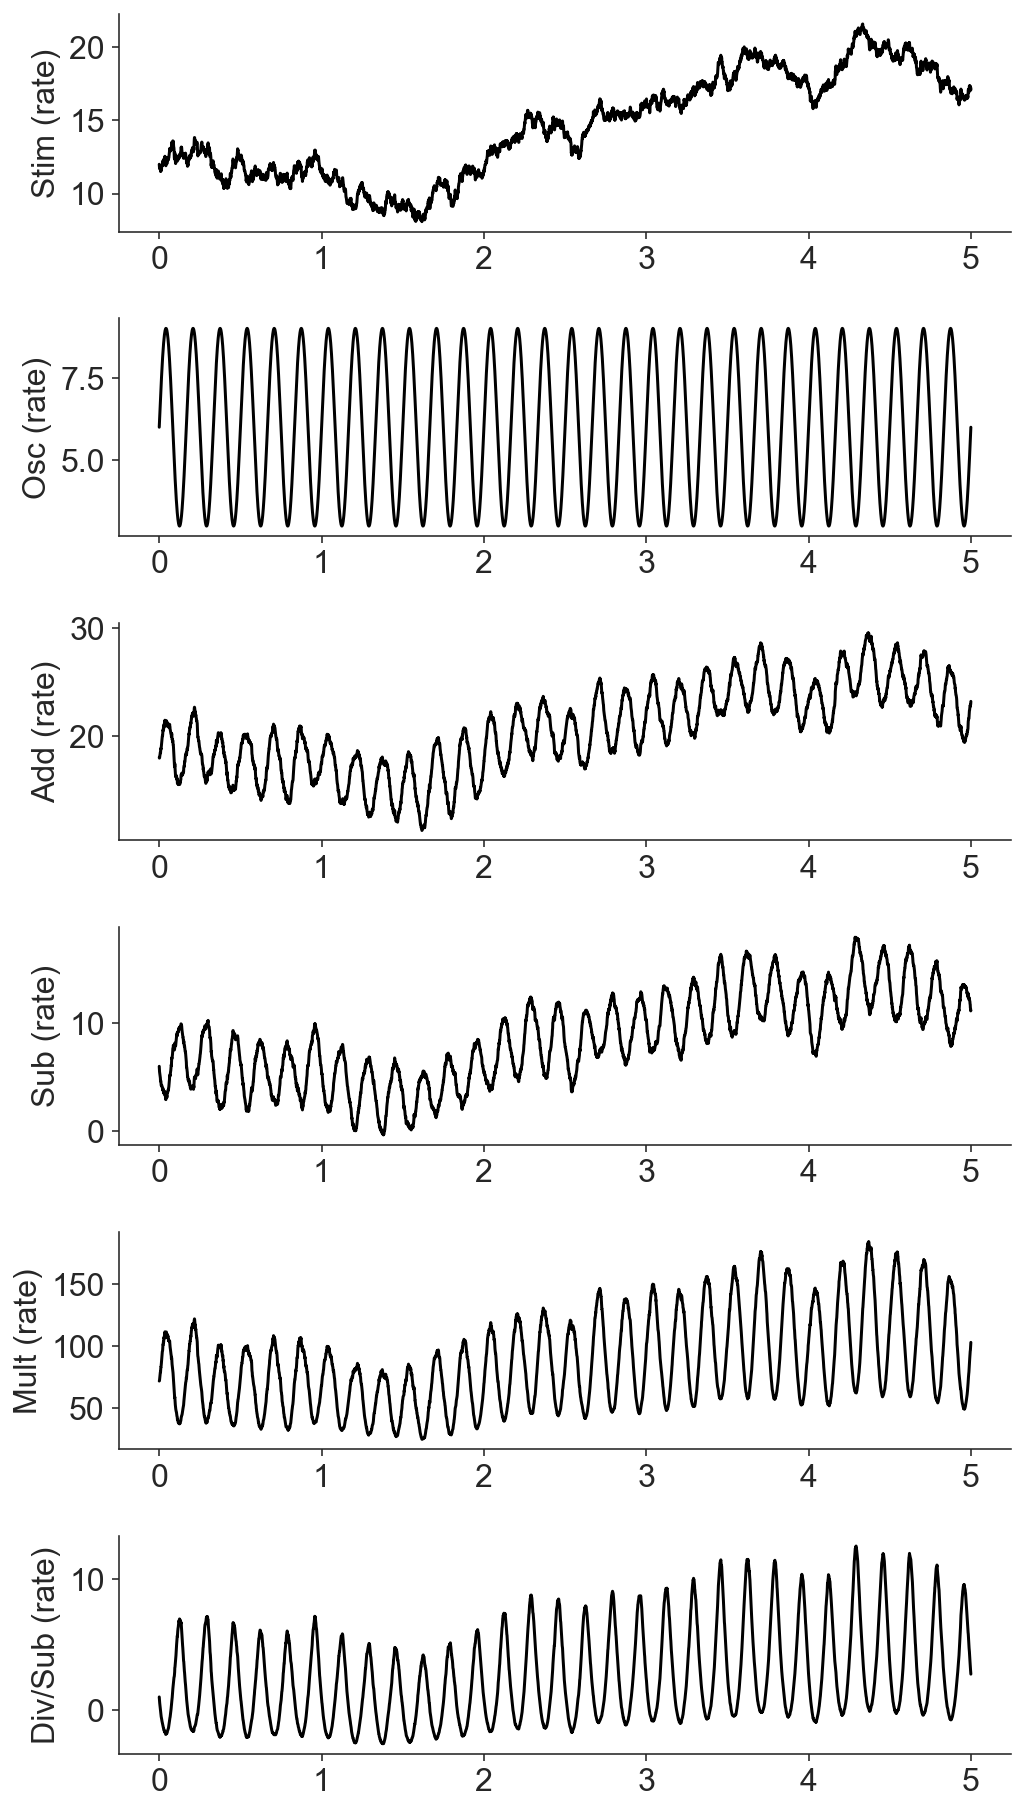

In [33]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["bias"]["osc"]
stim = result["bias"]["stim"]
add = result["bias"]["add"]
sub = result["bias"]["sub"]
mult = result["bias"]["mult"]
div_sub = result["bias"]["div_sub"]

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.ylabel("Stim (rate)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.ylabel("Osc (rate)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.ylabel("Add (rate)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.ylabel("Sub (rate)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.ylabel("Mult (rate)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.ylabel("Div/Sub (rate)")
sns.despine()

## Poisson rate

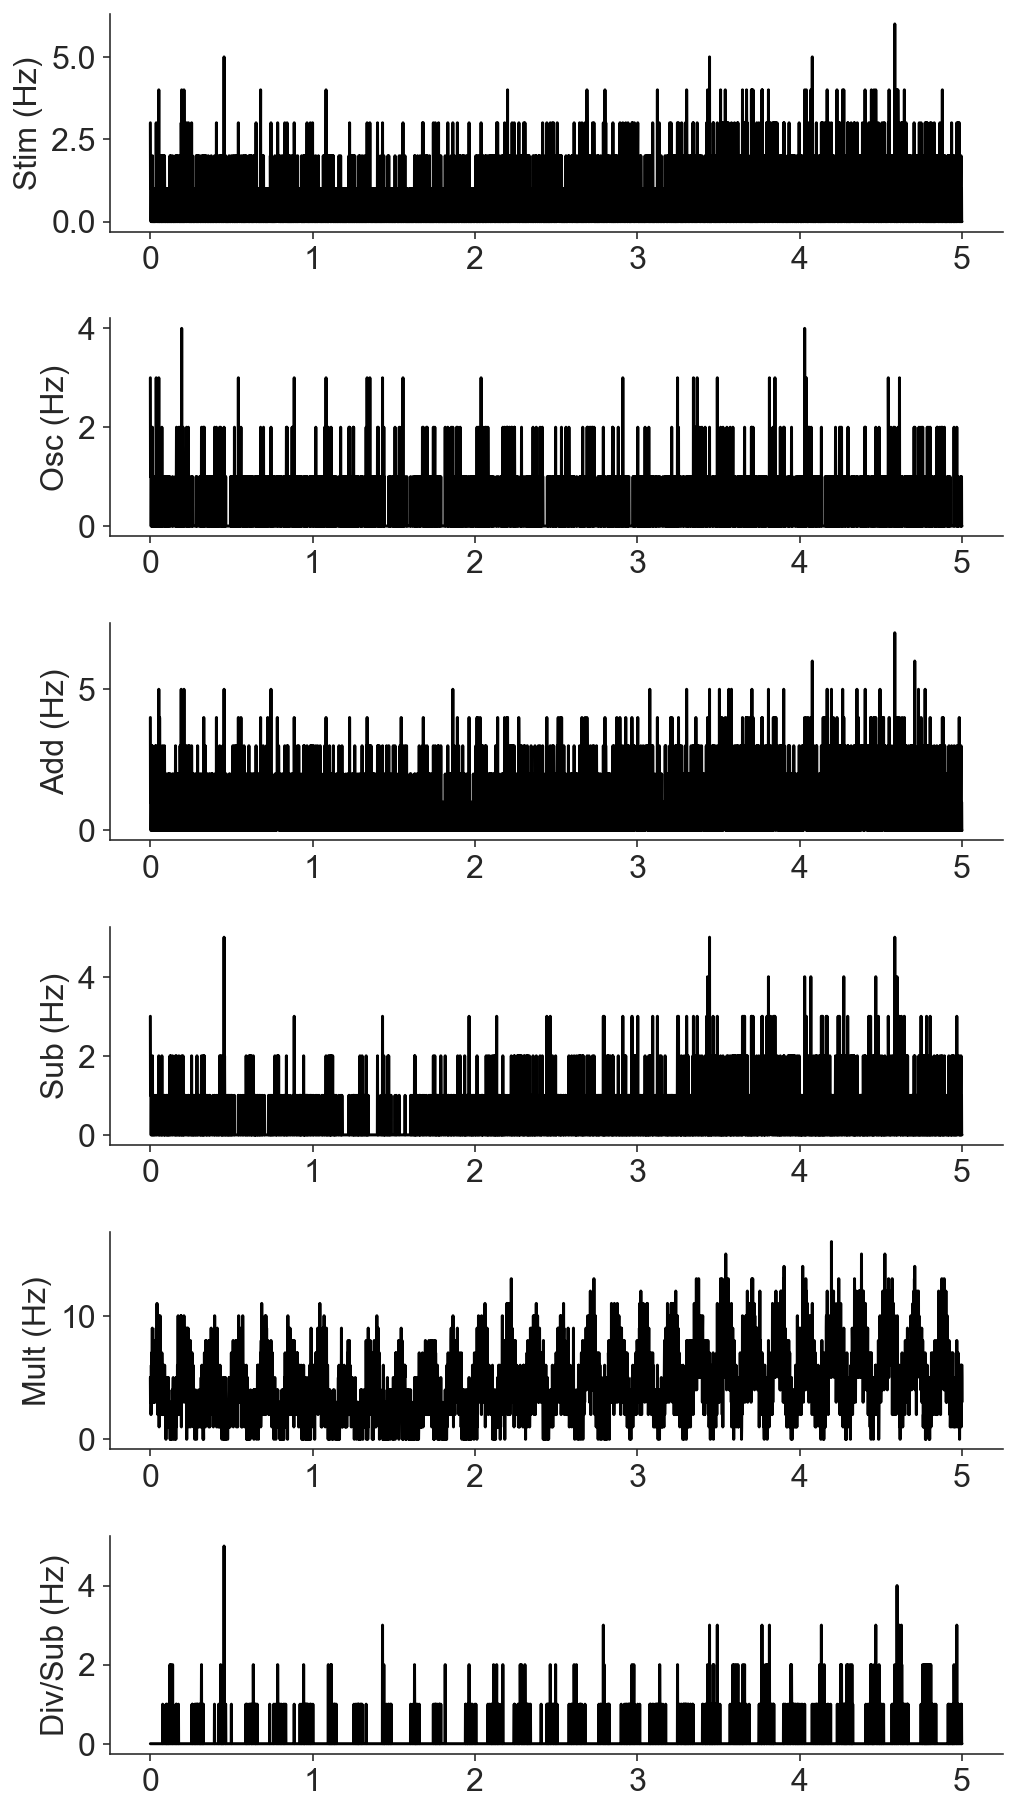

In [34]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["spikes"]["osc_p"].sum(1)
stim = result["spikes"]["stim_p"].sum(1)
add = result["spikes"]["add_p"].sum(1)
sub = result["spikes"]["sub_p"].sum(1)
mult = result["spikes"]["mult_p"].sum(1)
div_sub = result["spikes"]["div_sub_p"].sum(1)

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.ylabel("Osc (Hz)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.ylabel("Add (Hz)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.ylabel("Sub (Hz)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.ylabel("Mult (Hz)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.ylabel("Div/Sub (Hz)")
sns.despine()

## Rescaled Poisson

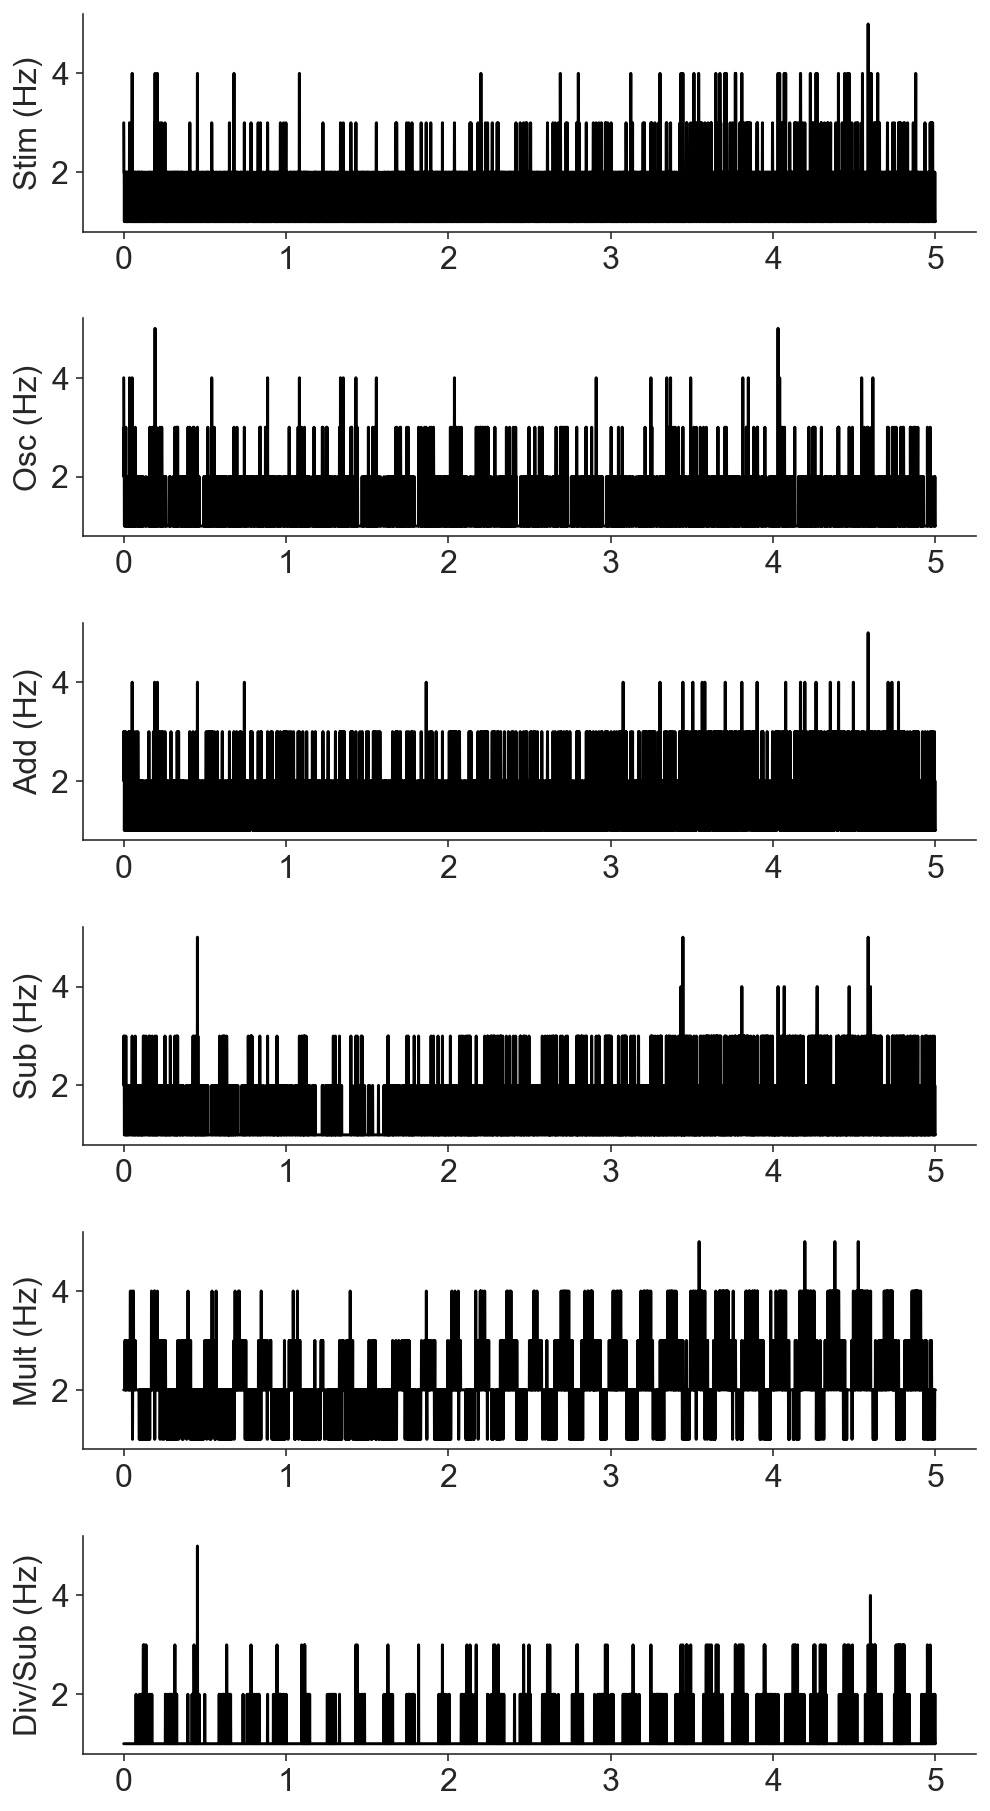

In [35]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["rescaled"]["osc_p"]
stim = result["rescaled"]["stim_p"]
add = result["rescaled"]["add_p"]
sub = result["rescaled"]["sub_p"]
mult = result["rescaled"]["mult_p"]
div_sub = result["rescaled"]["div_sub_p"]

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.ylabel("Osc (Hz)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.ylabel("Add (Hz)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.ylabel("Sub (Hz)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.ylabel("Mult (Hz)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.ylabel("Div/Sub (Hz)")
sns.despine()

# Histograms

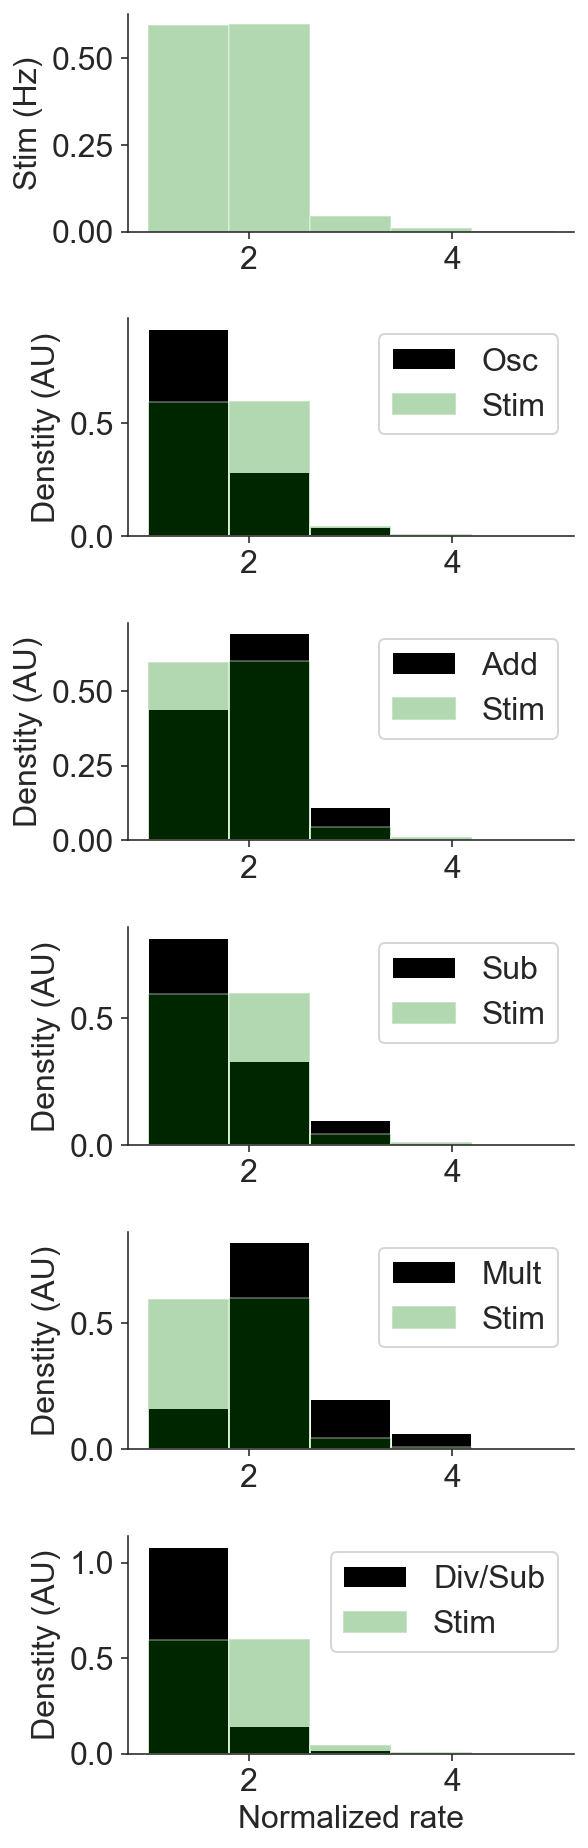

In [36]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["rescaled"]["osc_p"]
stim = result["rescaled"]["stim_p"]
add = result["rescaled"]["add_p"]
sub = result["rescaled"]["sub_p"]
mult = result["rescaled"]["mult_p"]
div_sub = result["rescaled"]["div_sub_p"]

# ---
fig = plt.figure(figsize=(4, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True)
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.hist(osc, color="black", bins=m, density=True, label="Osc")
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True, label="Stim")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[2, 0])
plt.hist(add, color="black", bins=m, density=True, label="Add")
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True, label="Stim")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[3, 0])
plt.hist(sub, color="black", bins=m, density=True, label="Sub")
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True, label="Stim")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[4, 0])
plt.hist(mult, color="black", bins=m, density=True, label="Mult")
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True, label="Stim")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[5, 0])
plt.hist(div_sub, color="black", bins=m, density=True, label="Div/Sub")
plt.hist(stim, color="green", alpha=0.3, bins=m, density=True, label="Stim")
plt.ylabel("Denstity (AU)")
plt.legend()
plt.xlabel("Normalized rate")
sns.despine()

## MI (Poisson)

In [22]:
result["MI"]

{'back_p': 0.14645345469434073,
 'osc_p': 0.30444216510323774,
 'stim_p': 0.4449364115250494,
 'mult_p': 0.5890516591436046,
 'add_p': 0.5297071387372803,
 'sub_p': 0.30577896586406567,
 'div_sub_p': 0.1557789325782739}

In [23]:
result["MI"]["mult_p"] - result["MI"]["sub_p"]

0.2832726932795389

In [24]:
result["MI"]["mult_p"] - result["MI"]["add_p"]

0.05934452040632432